In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-16 17:44:42--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-16 17:44:42--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13b735205538e6c078aece440f.dl.dropboxusercontent.com/zip_download_get/BjYNM3XqVk-TaFM12y_Agy-TzTT6kI7L1Sh9qYMvXhHgqBlJVjgH3pZe1xY9zNwkC_JO_-u6rn70iDtLGVVmIDve8349NT6IuyldZGXox6cfzw# [following]
--2023-07-16 17:44:43--  https://uc13b735205538e6c078aece440f.dl.dropboxusercontent.com/zip_download_get/BjYNM3XqVk-TaFM12y_Agy-TzTT6kI7L1Sh9qYMvXhHgqBlJVjgH3pZe1xY9zNwkC_JO_-u6rn70iDtLGVVmIDve8349NT6Iu

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [4]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [5]:
classes = os.listdir('images/Train')
classes

['Pikachu', 'Charmander', 'Bulbasaur']

In [6]:
for pokemon_type in classes:
    path = 'images/Train/'+ pokemon_type
    print(f'{pokemon_type} - {len(os.listdir(path))}')

Pikachu - 101
Charmander - 102
Bulbasaur - 101


In [7]:
from keras_preprocessing import image

In [8]:
train_data= []
train_labels = []

In [9]:
for category in classes:
    folder = f"images/Train/{category}"
    for image_name in os.listdir(folder):
        img_path = os.path.join(folder, image_name)
        img = image.load_img(img_path, target_size = (100,100))
        img_array = image.img_to_array(img)
        train_data.append(img_array)
        train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
len(train_data)

304

In [11]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [12]:
train_data = train_data.reshape(len(train_data), 30000)

In [13]:
train_data.shape

(304, 30000)

In [14]:
category2label = {"Pikachu": 0, "Charmander": 1,"Bulbasaur": 2}
label2category = {0: "Pikachu", 1: "Charmander", 2: "Bulbasaur"}

In [15]:
train_labels = np.array([category2label[label] for label in train_labels])

In [16]:
from keras.utils import to_categorical

In [17]:
train_labels = to_categorical(train_labels)
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
from keras.layers import Dense
from keras import Sequential

In [19]:
features = train_data.shape[1]

In [20]:
model = Sequential([
    Dense(units = 512, activation = 'relu', input_shape = (features,)),
    (Dense(units = 256, activation = 'relu')),
    (Dense(units = 128, activation = 'relu')),
    (Dense(units = 64, activation = 'relu')),
    (Dense(units = 3, activation = 'softmax'))
])


In [21]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy", metrics = ["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 50)

Epoch 1/50
10/10 [==============================] - 3s 171ms/step - loss: 3775.8535 - accuracy: 0.3289
Epoch 2/50
10/10 [==============================] - 2s 162ms/step - loss: 1447.9502 - accuracy: 0.3914
Epoch 3/50
10/10 [==============================] - 2s 163ms/step - loss: 710.1490 - accuracy: 0.4441
Epoch 4/50
10/10 [==============================] - 2s 157ms/step - loss: 485.3643 - accuracy: 0.5658
Epoch 5/50
10/10 [==============================] - 2s 155ms/step - loss: 176.4742 - accuracy: 0.6546
Epoch 6/50
10/10 [==============================] - 2s 151ms/step - loss: 101.7351 - accuracy: 0.7336
Epoch 7/50
10/10 [==============================] - 2s 223ms/step - loss: 175.9976 - accuracy: 0.7138
Epoch 8/50
10/10 [==============================] - 2s 164ms/step - loss: 73.9266 - accuracy: 0.7500
Epoch 9/50
10/10 [==============================] - 2s 159ms/step - loss: 64.3621 - accuracy: 0.7829
Epoch 10/50
10/10 [==============================] - 2s 160ms/step - loss: 56.0056

In [28]:
test_image = "/content/download.jpg"
img = image.load_img(test_image, target_size = (100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

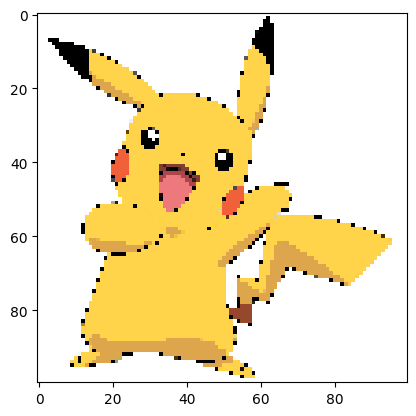

In [29]:
plt.imshow(img.astype('int'));


In [30]:
img = img.reshape(1, 30000)

In [31]:
model.predict(img).argmax()

1/1 [==============================] - 0s 113ms/step


0

In [32]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 29ms/step


'Pikachu'